In [1]:
import numpy as np
import pandas as pd

# from nse_pickle_fns import *
import os
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
from get_log_data import get_log_traintest

In [2]:

x_train, x_test, y_train, y_test, scaler_x, scaler_y = get_log_traintest()
x_train

array([[-0.99768573,  1.2688609 , -0.6293161 , ..., -0.02743011,
        -1.0924715 , -0.4947934 ],
       [-0.99708587,  0.6900069 , -0.22783814, ..., -0.00897573,
        -0.93708444, -0.95996606],
       [-0.99648607,  0.24695882,  0.01763118, ..., -0.00306188,
        -0.7507544 , -1.2232491 ],
       ...,
       [ 2.271976  , -1.080319  , -0.01070972, ..., -0.14546952,
         0.2078023 ,  1.1392142 ],
       [ 2.2723696 , -1.0539738 ,  0.14975137, ..., -0.1190684 ,
         0.14053515,  1.5288258 ],
       [ 2.2727633 , -0.98644596,  0.09481875, ..., -0.0979475 ,
         0.14053515,  1.2749879 ]], dtype=float32)

In [3]:
%matplotlib inline
from matplotlib import pyplot as plt
X=x_train[:,1:]
# from sklearn.cluster import KMeans
# kmeans = KMeans(n_clusters=4)
# kmeans.fit(X)
# y_kmeans = kmeans.predict(X)
# plt.scatter(X[:, 0], X[:, 2], c=y_kmeans, s=50, cmap='viridis')

# centers = kmeans.cluster_centers_
# plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
# centers

In [19]:
# np.max(X)
np.max(X[48:50,1:5])

8.208636

In [47]:
# X[48:50,1:5]
y_test[:,0]

array([ 0.5099961 ,  0.5193546 ,  0.49312392, ..., -0.0206762 ,
       -0.058215  , -0.28541246], dtype=float32)

In [33]:
# Euclidean Distance Caculator
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

# Number of clusters
k = 4
C_x=np.ndarray(X.shape[1])
C_x=[]
# X coordinates of random centroids
for i in range(X.shape[1]):
#     C_x[i]=[]
    C_x.append(np.random.randint(np.min(X[:,i]), np.max(X[:,i]), size=k))
    print(np.min(X[:,i]), np.max(X[:,i]))

# C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print("Initial Centroids")
print(C_x)


-2.6710303 5.718737
-4.5192327 4.695036
-1.2896303 12.93103
-1.3467205 16.23426
-7.756627 4.891613
-2.8501728 6.3068814
Initial Centroids
[array([1, 1, 4, 4]), array([-4, -4,  2, -3]), array([9, 5, 7, 8]), array([ 8,  6, 11, 10]), array([-3, -1, -1,  1]), array([-2, -2,  5, -2])]


In [63]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=7).fit(X)

In [64]:
kpred=kmeans.predict(x_test[:,1:])
kpred

array([5, 5, 5, ..., 6, 6, 6])

No handles with labels found to put in legend.
No handles with labels found to put in legend.


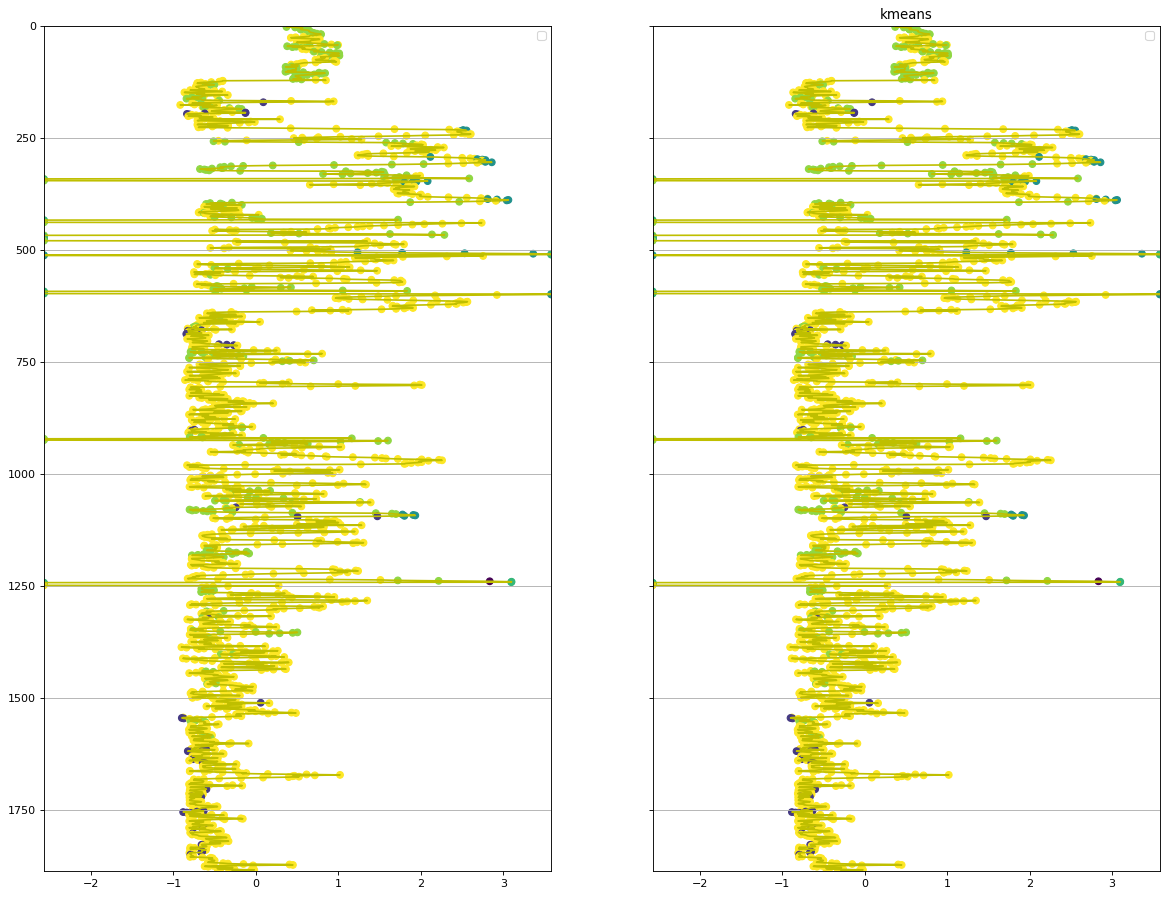

In [65]:
# kmeans

# plt.figure(figsize=(15,8))
# plt.subplot(121, title='"Neat" K-Means')
# plt.scatter(x_test[:,0], x_test[:,1], c=kpred)
# plt.show()
# plt.subplot(122, title='"Messy" K-Means')
# plt.scatter(x_messy[:,0], x_messy[:,1], c=km_messy, cmap=cmap)

imname='kmeans'

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 14), dpi= 80, sharey=True)
i=0
# perc_diff=(-Y_pred_inv+Y_train_inv)
for axes in ax:
    axes.scatter( y_test,range(len(y_test)), c=kpred)
    axes.plot( y_test,range(len(y_test)),'y')
    axes.set_xlim (min(y_test),max(y_test))

    axes.set_ylim (0,len(y_test))
    axes.legend()
    axes.invert_yaxis()
    axes.yaxis.grid(True)
plt.title(imname)
plt.show()  #5000 epochs, 1024
fig.savefig(imname+'_log.png', dpi=100)

In [ ]:
# Loop will run till the error becomes zero
Cs=deepcopy(C)
ithrun=0
# for j in range(0,1):
while error > 0.1:
    ithrun +=1
    # Assigning each value to its closest cluster
    print('{}th run'.format(ithrun))
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # Storing the old centroid values
    C_old = deepcopy(C)
    print(clusters)
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)
#     Cs=np.append(Cs,C, axis=0)
    Cs=np.concatenate((Cs,C), axis=0)

colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
#         print(points)
        if(len(points)>0):
            ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
for i in range(0,len(Cs),k):
    for j in range(k):
        plt.scatter(Cs[i+j][0], Cs[i+j][1], marker='*', s=200, c=colors[j])
#     plt.scatter(Cs[i+1][0], Cs[i+1][1], marker='*', s=200, c='r')
#     plt.scatter(Cs[i+2][0], Cs[i+2][1], marker='*', s=200, c='y')
# ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')
plt.show()